# **LOAN PREDICTION**

The **Loan Prediction Dataset** is used to predict loan approval based on applicants' demographic, financial, and credit information. Key features include applicant income, co-applicant income, loan amount, loan term, credit history, and property area. The target variable, "Loan_Status," indicates whether a loan was approved. This dataset supports building models for predicting loan eligibility, aiding in credit risk assessment.
The main goal is to use these features to develop a predictive model that can assess whether a loan application will be approved based on the applicant's characteristics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
data = pd.read_csv('/content/train_loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Missing Value Handling:
Filled missing categorical values with the mode and numerical values with the mean.


In [5]:
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
# Filling missing values
# For categorical features, fill with the mode
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# For numerical features, fill with the mean
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].mean(), inplace=True)

print("\nMissing Values After Filling:")
print(data.isnull().sum())



Missing Values After Filling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-8-af9211e2060c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
<ipython-input-8-af9211e2060c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

# Outlier Detection:
Detected and capped outliers in numerical columns using the IQR method.

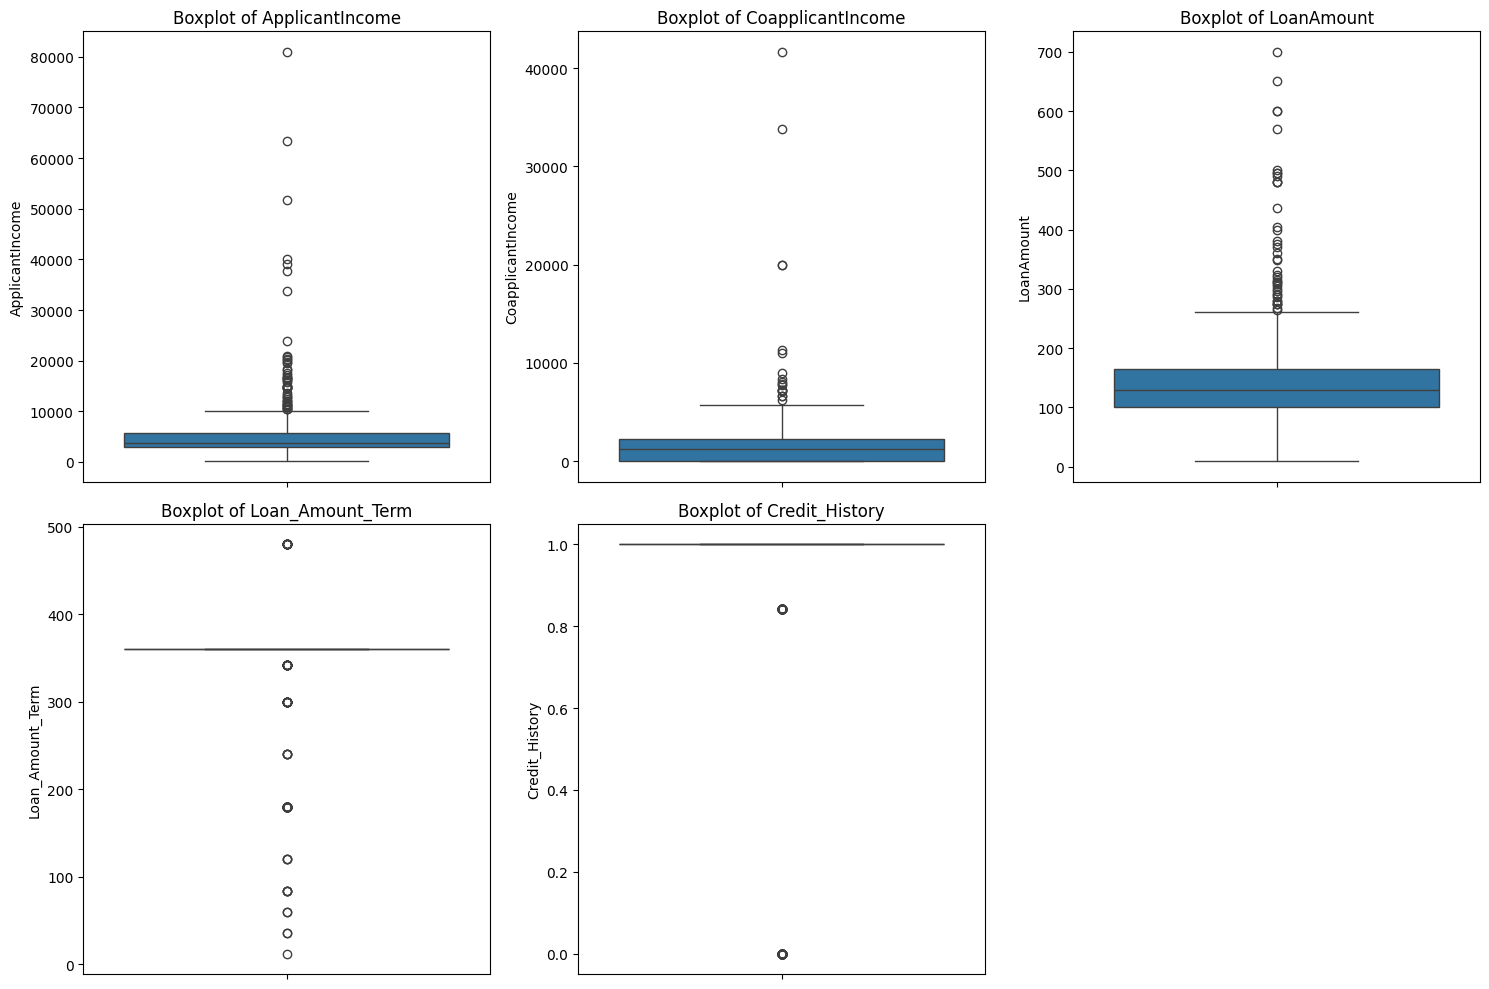

In [9]:
# Detecting outliers with boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [10]:
# Removing outliers (example using Z-score, you may try other methods if needed)
from scipy.stats import zscore
data = data[(np.abs(zscore(data.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]
print("\nData Shape After Outlier Removal:", data.shape)


Data Shape After Outlier Removal: (577, 13)


# Encoding:
Transformed categorical columns using Label Encoding and One-Hot Encoding.

In [12]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Storing encoder for future use
print("\nData After Encoding:")
print(data.head())


Data After Encoding:
   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0        

# Scaling:
Standardized numerical columns to a consistent scale

In [13]:
# Using StandardScaler to standardize numerical features
scaler = StandardScaler()
num_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[num_columns] = scaler.fit_transform(data[num_columns])
print("\nData After Scaling:")
print(data.head())


Data After Scaling:
    Loan_ID    Gender   Married  Dependents  Education  Self_Employed  \
0 -1.729052  0.477137 -1.362511   -0.723313  -0.541961      -0.380580   
1 -1.723048  0.477137  0.733939    0.282353  -0.541961      -0.380580   
2 -1.717044  0.477137  0.733939   -0.723313  -0.541961       2.627567   
3 -1.711041  0.477137  0.733939   -0.723313   1.845150      -0.380580   
4 -1.705037  0.477137 -1.362511   -0.723313  -0.541961      -0.380580   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.399266          -0.861036    0.184585          0.239408   
1        -0.028020           0.052840   -0.143355          0.239408   
2        -0.562297          -0.861036   -1.247642          0.239408   
3        -0.703039           0.567956   -0.285844          0.239408   
4         0.450230          -0.861036    0.088189          0.239408   

   Credit_History  Property_Area  Loan_Status  
0        0.456461       1.227472     0.670633  
1        0.456461

In [15]:
# Save preprocessed data to a new CSV
data.to_csv('/content/processed_loan_data.csv', index=False)
print("\nPreprocessed Data Saved Successfully")


Preprocessed Data Saved Successfully
